In [293]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import dateutil
import statsmodels
import statsmodels.api as sm
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import metrics 
from sklearn.model_selection import train_test_split,RepeatedKFold
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
sns.set()
pd.options.display.max_columns = None

In [2]:
dataset_path = "../Dataset/Final_ehr_claims/"

In [3]:
df = pd.read_csv(dataset_path+"dataset1.csv").drop(columns=['language'])
df

,admission_type,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,gender,LENGTH_OF_STAY,AGE,AGE_BINS,LENGTH_OF_STAY_BINS,TOTAL_COST,PAYABLE,ICU_LOS
0,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,MARRIED,WHITE,Male,5,71.0,"(70.2, 77.9]","(3.5, 7.0]",11108.0,1068.0,1.0
1,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,PROTESTANT QUAKER,SINGLE,WHITE,Male,2,39.0,"(31.7, 39.4]","(-0.035, 3.5]",4100.0,1100.0,0.0
2,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,MARRIED,WHITE,Male,5,74.0,"(70.2, 77.9]","(3.5, 7.0]",7100.0,1100.0,1.0
3,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,DIVORCED,WHITE,Female,10,69.0,"(62.5, 70.2]","(7.0, 10.5]",36264.0,1024.0,5.0
4,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,NOT SPECIFIED,MARRIED,WHITE,Male,8,69.0,"(62.5, 70.2]","(7.0, 10.5]",12724.0,1024.0,1.0
5,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LONG TERM CARE HOSPITAL,Medicare,CATHOLIC,WIDOWED,WHITE,Male,25,75.0,"(70.2, 77.9]","(24.5, 28.0]",34024.0,1024.0,25.0
6,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Self Pay,BUDDHIST,MARRIED,OTHERS,Male,3,48.0,"(47.1, 54.8]","(-0.035, 3.5]",7068.0,1068.0,3.0
7,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,UNOBTAINABLE,WIDOWED,WHITE,Female,6,85.0,"(77.9, 85.6]","(3.5, 7.0]",1024.0,1024.0,0.0
8,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,JEWISH,MARRIED,WHITE,Male,7,59.0,"(54.8, 62.5]","(3.5, 7.0]",5180.0,1100.0,1.0
9,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,CATHOLIC,MARRIED,OTHERS,Male,7,80.0,"(77.9, 85.6]","(3.5, 7.0]",6068.0,1068.0,4.0


In [4]:
df.religion.fillna('NOT SPECIFIED',inplace=True)
df.religion = df.religion.apply(lambda x : "NOT SPECIFIED" if x == "UNOBTAINABLE" else x)
def filter_religion(val):
    if val not in ["CATHOLIC","PROTESTANT QUAKER","NOT SPECIFIED","JEWISH"]:
        return "OTHER"
    else:
        return val
df.religion = df.religion.apply(filter_religion)
df.marital_status.fillna('UNKNOWN (DEFAULT)',inplace=True)
df

,admission_type,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,gender,LENGTH_OF_STAY,AGE,AGE_BINS,LENGTH_OF_STAY_BINS,TOTAL_COST,PAYABLE,ICU_LOS
0,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,MARRIED,WHITE,Male,5,71.0,"(70.2, 77.9]","(3.5, 7.0]",11108.0,1068.0,1.0
1,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,PROTESTANT QUAKER,SINGLE,WHITE,Male,2,39.0,"(31.7, 39.4]","(-0.035, 3.5]",4100.0,1100.0,0.0
2,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,MARRIED,WHITE,Male,5,74.0,"(70.2, 77.9]","(3.5, 7.0]",7100.0,1100.0,1.0
3,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,DIVORCED,WHITE,Female,10,69.0,"(62.5, 70.2]","(7.0, 10.5]",36264.0,1024.0,5.0
4,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,NOT SPECIFIED,MARRIED,WHITE,Male,8,69.0,"(62.5, 70.2]","(7.0, 10.5]",12724.0,1024.0,1.0
5,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LONG TERM CARE HOSPITAL,Medicare,CATHOLIC,WIDOWED,WHITE,Male,25,75.0,"(70.2, 77.9]","(24.5, 28.0]",34024.0,1024.0,25.0
6,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Self Pay,OTHER,MARRIED,OTHERS,Male,3,48.0,"(47.1, 54.8]","(-0.035, 3.5]",7068.0,1068.0,3.0
7,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NOT SPECIFIED,WIDOWED,WHITE,Female,6,85.0,"(77.9, 85.6]","(3.5, 7.0]",1024.0,1024.0,0.0
8,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,JEWISH,MARRIED,WHITE,Male,7,59.0,"(54.8, 62.5]","(3.5, 7.0]",5180.0,1100.0,1.0
9,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,CATHOLIC,MARRIED,OTHERS,Male,7,80.0,"(77.9, 85.6]","(3.5, 7.0]",6068.0,1068.0,4.0


In [5]:
def plot_univariate(df,columns=None):
    '''Function plots distribution of all the columns specified.
    
    Parameters
    ----------
    df -> The pandas dataframe
    columns -> the specific list of columns you want to plot. All if not specified.
    '''
    if columns==None:
        columns=df.columns
    for column in columns:
        if (df[column].dtype == 'float') or ('int' in str(df[column].dtype)):
            df[column].plot.hist()
            plt.title("Histogram of "+column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        elif df[column].dtype == 'object':
            df[column].value_counts(sort=False).plot.bar()
            plt.title("Distribution of "+column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        else:
            print("Unable to plot column "+column)
            continue
        plt.show()
def plot_bivariate(df,target,columns=None,box=True,pie=True,bar=True,scatter=False):
    '''Function plots the bivariate graph of all the columns specified against the quantative target variable
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to plot against
    columns -> the specific list of columns you want to plot. All if not specified.
    BOX,PIE,BAR,scatter are the types of plots. If value is true, then the type will be plotted for all columns
    Note:
    pie chart will be plotted for the contribution of each class for the value in target variable, i.e, sum of total cost for each class
    bar is similarly plotted for the mean of the total cost for each class
    '''
    if columns==None:
        columns=df.columns
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    if box:
        for column in columns:
            if df[column].dtype=="object":
                df.boxplot(column = target,by=column)
                plt.title('')
                plt.ylabel(target)
                plt.ylim(0,70000)
                plt.show()
    if pie:
        for column in columns:
            if df[column].dtype=="object":
                df.groupby(column).TOTAL_COST.sum().plot.pie(autopct='%1.0f%%')
                plt.title("Contribution of each "+column+" for total cost")
                plt.show()
    if bar:
        for column in columns:
            if df[column].dtype=='object':
                df.groupby(column).TOTAL_COST.mean().plot.bar()
                plt.title("Mean of the total cost for each "+column)
                plt.show()
    if scatter:
        for column in columns:
            if df[column].dtype!='object':
                sns.regplot(x=column, y=target, data=df,fit_reg=False)
                plt.title("Correlation of "+column+" and "+target)
                plt.ylabel(target)
                plt.show()

In [6]:
def plot_multi(df,columns=None,target="TOTAL_COST"):
    '''Function plots the multivariate graph of all the columns specified against the quantative target variable by making combinations of two
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to plot against
    columns -> the specific list of columns you want to plot. All if not specified.
    '''
    if columns==None:
        columns=df.columns
    combinations = list(itertools.combinations(columns,2))
    for a,b in combinations:
        flag=0
        comb=[a,b]
        for x in comb:
            if df[x].dtype !="object":
                flag=1
        if flag==0:
            df.groupby([*comb])[target].mean().plot.bar()
            #sns.barplot(x = a, y = target ,hue = b, data = df)
            plt.title(",".join(comb)+" correlation with "+target)
            plt.show()

Checking if the total cost is normally distributed:-

In [7]:
stats.normaltest(df.TOTAL_COST)

NormaltestResult(statistic=503.08564608668826, pvalue=5.706108033916647e-110)

The extremely low p value suggests that total cost is not normally distributed

In [8]:
def kruskal_wallis_wrapper(df,target,columns=None,verbose=False,alpha=0.05):
    '''Function performs the Kruskal-Wallis H-test of all the columns with the target variable.
    The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA.
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to test for
    columns -> the specific list of columns you want test. All if not specified.
    '''
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype=='object']
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    for column in columns:
        assert df[column].dtype == 'object',"This function is intended for categorical indipendent variables"
    useful_columns = []
    for column in columns:
            print("For "+column+" :-")
            groups = df.groupby(column)
            data = [groups.get_group(x)[target] for x in groups.groups]
            res = scipy.stats.kruskal(*data)
            if verbose:
                print(res)
            if res.pvalue < alpha :
                print("Reject null hypothesis\n----------------")
                useful_columns.append(column)
            else:
                print("Accept null hypothesis\n----------------")
    print("According to the test, the useful columns are :-\n"+",".join(useful_columns))
            

Since the independent variable is a categorical variable and dependent variable is a quantative non normally distributed variable, we use the kruskal wallis test to see if there is a difference in the median of the total cost in the two different genders.

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA

In [9]:
kruskal_wallis_wrapper(df,"TOTAL_COST",verbose=True)

For admission_type :-
KruskalResult(statistic=1.7090816474215875, pvalue=0.42547851588064334)
Accept null hypothesis
----------------
For admission_location :-
KruskalResult(statistic=9.900223698032727, pvalue=0.07811223425601643)
Accept null hypothesis
----------------
For discharge_location :-
KruskalResult(statistic=46.027901151245864, pvalue=3.196857653757812e-06)
Reject null hypothesis
----------------
For insurance :-
KruskalResult(statistic=4.319521037627343, pvalue=0.3644870416215493)
Accept null hypothesis
----------------
For religion :-
KruskalResult(statistic=4.817887219743448, pvalue=0.30649888593818403)
Accept null hypothesis
----------------
For marital_status :-
KruskalResult(statistic=6.27077526443709, pvalue=0.2807557739805559)
Accept null hypothesis
----------------
For ethnicity :-
KruskalResult(statistic=0.9575626268240267, pvalue=0.8115189844102259)
Accept null hypothesis
----------------
For gender :-
KruskalResult(statistic=6.026954825426316, pvalue=0.0140890189

Another way to perform tests is to transform the data to a normally distributed value. We can do this using the boxcox module of scipy
The Box-Cox transform is given by:

y = (x**lmbda - 1) / lmbda,  for lmbda > 0
    log(x),                  for lmbda = 0

lambda can be supplied, or the method will automatically find the lambda that maximizes the log-likelihood function

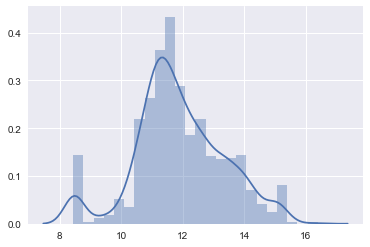

In [10]:
from scipy.stats import boxcox
data = df.TOTAL_COST
boxcox(data,0)
sns.distplot(boxcox(data)[0])

Box cox will transform the data into a normally distributed data

In [11]:
stats.normaltest(boxcox(data)[0])

NormaltestResult(statistic=2.5167283564134193, pvalue=0.28411841366183843)

Add this as the normally distributed value of the total cost

In [12]:
df["TOTAL_COST_NORMAL"] = boxcox(df.TOTAL_COST)[0]
stats.normaltest(df.TOTAL_COST_NORMAL)

NormaltestResult(statistic=2.5167283564134193, pvalue=0.28411841366183843)

In [13]:
def anova_wrapper(df,target,columns=None,verbose=False,alpha=0.05):
    '''Function performs the anova test of all the columns with the target variable.
    The anova test tests the null hypothesis that the population median of all of the groups are equal.
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to test for
    columns -> the specific list of columns you want test. All if not specified.
    '''
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype=='object']
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    for column in columns:
        assert df[column].dtype == 'object',"This function is intended for categorical indipendent variables"
    useful_columns = []
    for column in columns:
            print("For "+column+" :-")
            groups = df.groupby(column)
            data = [groups.get_group(x)[target] for x in groups.groups]
            res = scipy.stats.f_oneway(*data)
            if verbose:
                print(res)
            if res.pvalue < alpha :
                print("Reject null hypothesis\n----------------")
                useful_columns.append(column)
            else:
                print("Accept null hypothesis\n----------------")
    print("According to the test, the useful columns are :-\n"+", ".join(useful_columns))

In [14]:
anova_wrapper(df,"TOTAL_COST_NORMAL",verbose=True)

For admission_type :-
F_onewayResult(statistic=0.8237067313621819, pvalue=0.4391192611398024)
Accept null hypothesis
----------------
For admission_location :-
F_onewayResult(statistic=1.8056878921804975, pvalue=0.1090832060879781)
Accept null hypothesis
----------------
For discharge_location :-
F_onewayResult(statistic=4.002042174354893, pvalue=9.94965569695693e-06)
Reject null hypothesis
----------------
For insurance :-
F_onewayResult(statistic=0.659555153256302, pvalue=0.6202261317015649)
Accept null hypothesis
----------------
For religion :-
F_onewayResult(statistic=1.654145049987398, pvalue=0.15857694327170516)
Accept null hypothesis
----------------
For marital_status :-
F_onewayResult(statistic=1.3196003820159414, pvalue=0.25334760092829106)
Accept null hypothesis
----------------
For ethnicity :-
F_onewayResult(statistic=0.18686866333366817, pvalue=0.905358835568269)
Accept null hypothesis
----------------
For gender :-
F_onewayResult(statistic=3.768661115000343, pvalue=0.05

In [15]:
def pearson_wrapper(df,target,columns=None,verbose=False,alpha=0.05):
    '''Function performs the pearson correlation test of all the columns with the target variable.
    The anova test tests the null hypothesis that the population median of all of the groups are equal.
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to test for
    columns -> the specific list of columns you want test. All if not specified.
    '''
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype=='float']
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    for column in columns:
        assert df[column].dtype == 'float',"This function is intended for quantative indipendent variables"
    useful_columns = []
    for column in columns:
            print("For "+column+" :-")
            res = scipy.stats.pearsonr(df[column],df[target])
            if verbose:
                print(res)
            if res[1] < alpha :
                print("Reject null hypothesis\n----------------")
                useful_columns.append(column)
            else:
                print("Accept null hypothesis\n----------------")
    print("According to the test, the useful columns are :-\n"+", ".join(useful_columns))

The Pearson correlation coefficient measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

In [16]:
df["LENGTH_OF_STAY"] = df["LENGTH_OF_STAY"].astype('float')
df["ICU_LOS"] = df["ICU_LOS"].astype('float')
pearson_wrapper(df,"TOTAL_COST_NORMAL")

For LENGTH_OF_STAY :-
Reject null hypothesis
----------------
For AGE :-
Accept null hypothesis
----------------
For TOTAL_COST :-
Reject null hypothesis
----------------
For PAYABLE :-
Reject null hypothesis
----------------
For ICU_LOS :-
Reject null hypothesis
----------------
For TOTAL_COST_NORMAL :-
Reject null hypothesis
----------------
According to the test, the useful columns are :-
LENGTH_OF_STAY, TOTAL_COST, PAYABLE, ICU_LOS, TOTAL_COST_NORMAL


Using other techniques for feature selection :-

1)Recursive feature elimination

2)Best features selection using extra trees regressors

Since we have categorical columns, we need to convert that into numeric columns in order to feed it to the model. Hence we use sklearn's lable encoder for this

In [17]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                if output[colname].dtype == 'object':
                    print("Encoding "+colname)
                    output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
encoding_pipeline = Pipeline([
('encoding',MultiColumnLabelEncoder())
# add more pipeline steps as needed
])
labeled_df = encoding_pipeline.fit_transform(df)
labeled_df

Encoding admission_type
Encoding admission_location
Encoding discharge_location
Encoding insurance
Encoding religion
Encoding marital_status
Encoding ethnicity
Encoding gender
Encoding AGE_BINS
Encoding LENGTH_OF_STAY_BINS


,admission_type,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,gender,LENGTH_OF_STAY,AGE,AGE_BINS,LENGTH_OF_STAY_BINS,TOTAL_COST,PAYABLE,ICU_LOS,TOTAL_COST_NORMAL
0,0,2,4,2,0,1,3,1,5.0,71.0,5,6,11108.0,1068.0,1.0,12.185047
1,1,3,3,3,4,3,3,1,2.0,39.0,0,0,4100.0,1100.0,0.0,10.562058
2,0,2,4,2,0,1,3,1,5.0,74.0,5,6,7100.0,1100.0,1.0,11.445151
3,0,2,4,2,0,0,3,0,10.0,69.0,4,8,36264.0,1024.0,5.0,14.231473
4,1,0,4,2,2,1,3,1,8.0,69.0,4,8,12724.0,1024.0,1.0,12.413228
5,1,3,8,2,0,5,3,1,25.0,75.0,5,5,34024.0,1024.0,25.0,14.117748
6,1,3,3,4,3,1,2,1,3.0,48.0,2,0,7068.0,1068.0,3.0,11.437776
7,1,1,11,2,2,5,3,0,6.0,85.0,6,6,1024.0,1024.0,0.0,8.446852
8,1,0,3,3,1,1,3,1,7.0,59.0,3,6,5180.0,1100.0,1.0,10.934817
9,1,0,11,2,0,1,2,1,7.0,80.0,6,6,6068.0,1068.0,4.0,11.189809


In [63]:
features_labeled = labeled_df.drop(columns = ["TOTAL_COST","PAYABLE","TOTAL_COST_NORMAL"])
target_labeled = labeled_df["TOTAL_COST"]

In [64]:
def cat_encoder(df,columns=None):
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype == 'object']
    df1 = df.copy()
    for column in columns:
        df1 = pd.concat([df1,df1[column].str.get_dummies()],axis=1)
    df1 = df1.drop(columns = columns)
    return df1

encoded_df = cat_encoder(df.drop(columns = ["LENGTH_OF_STAY_BINS","AGE_BINS"]))

encoded_df

,LENGTH_OF_STAY,AGE,TOTAL_COST,PAYABLE,ICU_LOS,TOTAL_COST_NORMAL,ELECTIVE,EMERGENCY,URGENT,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,TRANSFER FROM OTHER HEALT,TRANSFER FROM SKILLED NUR,DEAD/EXPIRED,DISC-TRAN CANCER/CHLDRN H,DISCH-TRAN TO PSYCH HOSP,HOME,HOME HEALTH CARE,HOSPICE-HOME,HOSPICE-MEDICAL FACILITY,LEFT AGAINST MEDICAL ADVI,LONG TERM CARE HOSPITAL,REHAB/DISTINCT PART HOSP,SHORT TERM HOSPITAL,SNF,Government,Medicaid,Medicare,Private,Self Pay,CATHOLIC,JEWISH,NOT SPECIFIED,OTHER,PROTESTANT QUAKER,DIVORCED,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED,BLACK,HISPANIC,OTHERS,WHITE,Female,Male
0,5.0,71.0,11108.0,1068.0,1.0,12.185047,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,2.0,39.0,4100.0,1100.0,0.0,10.562058,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
2,5.0,74.0,7100.0,1100.0,1.0,11.445151,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,10.0,69.0,36264.0,1024.0,5.0,14.231473,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,8.0,69.0,12724.0,1024.0,1.0,12.413228,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
5,25.0,75.0,34024.0,1024.0,25.0,14.117748,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
6,3.0,48.0,7068.0,1068.0,3.0,11.437776,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
7,6.0,85.0,1024.0,1024.0,0.0,8.446852,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
8,7.0,59.0,5180.0,1100.0,1.0,10.934817,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
9,7.0,80.0,6068.0,1068.0,4.0,11.189809,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [65]:
features_onehot = encoded_df.drop(columns=["TOTAL_COST","PAYABLE","TOTAL_COST_NORMAL"])
target_onehot = encoded_df["TOTAL_COST"]

In [66]:
model = LinearRegression()
model.fit(features_onehot,encoded_df["TOTAL_COST"])
#model.score(df1["ethnicity"],df1["TOTAL_COST"])
#model.predict(encoded_df.loc[:,"CLINIC REFERRAL/PREMATURE":])
r2_score(model.predict(features_onehot),target_onehot)

-4.611118069454684

Recursive feature elimination:-

In [254]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = features_labeled,target_labeled
estimator = LinearRegression()
selector = RFE(estimator, 20, step=1)
selector = selector.fit(X, y)
selector.support_ 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [255]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Another method to do feature selection automatically is to use the select from model module

In [260]:
from sklearn.feature_selection import SelectFromModel
X, y = features_labeled,target_labeled
X.shape

(941, 13)

In [261]:
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor()
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(941, 5)

In [262]:
clf = LinearRegression()
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(941, 5)

In [263]:
clf = SVR(kernel='linear')
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(941, 3)

In [264]:
clf = Pipeline([
  ('std',preprocessing.StandardScaler()),
  ('transform', preprocessing.QuantileTransformer()),
  ('feature_selection', SelectFromModel(ExtraTreesRegressor(bootstrap=True))),
  ('Regression', ExtraTreesRegressor())
])
clf.fit(X, y)
clf.predict(X)

array([ 11108.        ,   4100.        ,   7100.        ,  36264.        ,
        12724.        ,  34024.        ,   7068.        ,   1024.        ,
         5180.        ,   6068.        ,  10024.        ,   6090.66666667,
        14068.        ,   9068.        ,  20024.        ,  50000.        ,
         9204.        ,   4068.        ,  58024.        ,   6100.        ,
         1024.        ,   6220.        ,   4068.        ,   8188.        ,
         7546.        ,  14150.        ,  13068.        ,   4024.        ,
         7024.        ,  42024.        ,  19100.        ,   3024.        ,
        15068.        ,  10068.        ,  11024.        ,   6068.        ,
         8500.        ,  10068.        ,   5024.        ,   7102.        ,
        11100.        ,  17100.        ,   5068.        ,  23100.        ,
         9204.        ,   1024.        ,   9204.        ,   1024.        ,
        15024.        ,   7054.        ,   9100.        ,   3100.        ,
         1068.        ,  

In [290]:
def create_pipe_model(model):
    return Pipeline([
                  ('std',preprocessing.StandardScaler()),
                  ('transform', preprocessing.QuantileTransformer()),
                  ('feature_selection', SelectFromModel(model)),
                  ('Regression', model)
                    ])
def reg_metric(y,y_pred):
    result = defaultdict()
    result["Explained_variance_score"] = metrics.explained_variance_score(y,y_pred)
    result["Mean_absolute_error"] = metrics.mean_absolute_error(y,y_pred)
    result["Mean_squared_error"] = metrics.mean_squared_error(y,y_pred)
    result["Mean_squared_log_error"] = metrics.mean_squared_log_error(y,y_pred)
    result["Median_absolute_error"] = metrics.median_absolute_error(y,y_pred)
    return result
def run_model(model,X,y,test_size=0.1,verbose=False):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state = 20)
    clf = create_pipe_model(model)
    clf.fit(X_train,y_train)
    print("Training set stats : ",reg_metric(y_train,clf.predict(X_train)))
    print("Testing set stats : ",reg_metric(y_test,clf.predict(X_test)))
    if verbose==True:
        print(y_test,clf.predict(X_test))

In [291]:
from sklearn.linear_model import Ridge
run_model(Ridge(),X,y)

Training set stats :  defaultdict(None, {'Explained_variance_score': 0.1448570949933058, 'Mean_absolute_error': 8100.905237862831, 'Mean_squared_error': 143695559.79660338, 'Mean_squared_log_error': 0.7898142577233972, 'Median_absolute_error': 5696.018469804065})
Testing set stats :  defaultdict(None, {'Explained_variance_score': 0.12921495199655297, 'Mean_absolute_error': 8366.463555303093, 'Mean_squared_error': 152515787.08171862, 'Mean_squared_log_error': 0.7242152316067684, 'Median_absolute_error': 4909.998724189187})


In [283]:
run_model(ExtraTreesRegressor(max_depth=10),X,y)

Training set stats :  defaultdict(None, {'Explained_variance_score': 0.7752785006668234, 'Mean_absolute_error': 3851.1087909168223, 'Mean_squared_error': 37761503.3182788, 'Mean_squared_log_error': 0.3143946672014372, 'Median_absolute_error': 2329.161998039954})
Testing set stats :  defaultdict(None, {'Explained_variance_score': -0.03526129170410752, 'Mean_absolute_error': 8790.069167060172, 'Mean_squared_error': 180787231.6172928, 'Mean_squared_log_error': 0.795369901288607, 'Median_absolute_error': 4560.607483530961})


In [284]:
run_model(Lasso(),X,y)

Training set stats :  defaultdict(None, {'Explained_variance_score': 0.15370574563558959, 'Mean_absolute_error': 8093.780039408037, 'Mean_squared_error': 142208660.00471705, 'Mean_squared_log_error': 0.7885271016300129, 'Median_absolute_error': 6023.993224557468})
Testing set stats :  defaultdict(None, {'Explained_variance_score': 0.1255701076460386, 'Mean_absolute_error': 8486.435954718254, 'Mean_squared_error': 152842807.8130165, 'Mean_squared_log_error': 0.7447073716932874, 'Median_absolute_error': 5470.891979435113})


In [285]:
from sklearn.model_selection import cross_val_score
cross_val_score(create_pipe_model(ExtraTreesRegressor()),X,y,cv=5,scoring='explained_variance')

array([-0.43038698, -0.00607575, -0.18801488, -0.31599981, -0.21392343])

In [273]:
run_model(SVR(kernel='linear'),X,y)

Training set stats :  defaultdict(None, {'Explained_variance_score': 0.0017123758773094355, 'Mean_absolute_error': 7929.252717805137, 'Mean_squared_error': 193032567.6563116, 'Mean_squared_log_error': 0.7838231957585235, 'Median_absolute_error': 3910.869177999939})
Testing set stats :  defaultdict(None, {'Explained_variance_score': 0.002129872250675291, 'Mean_absolute_error': 8895.246291596877, 'Mean_squared_error': 216118356.9850333, 'Mean_squared_log_error': 0.7954932002830889, 'Median_absolute_error': 4010.8825188940427})


In [295]:
run_model(ElasticNet(),X,y,verbose=False)

Training set stats :  defaultdict(None, {'Explained_variance_score': 0.04292715704491645, 'Mean_absolute_error': 8751.327570807112, 'Mean_squared_error': 160823550.2269423, 'Mean_squared_log_error': 0.8817384721706407, 'Median_absolute_error': 6782.617013984175})
Testing set stats :  defaultdict(None, {'Explained_variance_score': 0.04817200208608241, 'Mean_absolute_error': 9100.17945213827, 'Mean_squared_error': 167662844.95659336, 'Mean_squared_log_error': 0.7764152794867275, 'Median_absolute_error': 6474.570915914906})


In [299]:
run_model(perceptron.Perceptron(),X,y)

Training set stats :  defaultdict(None, {'Explained_variance_score': -0.4463883467254415, 'Mean_absolute_error': 14251.813238770686, 'Mean_squared_error': 315292951.7115839, 'Mean_squared_log_error': 1.6041127291674924, 'Median_absolute_error': 14882.0})
Testing set stats :  defaultdict(None, {'Explained_variance_score': -0.4428025393727215, 'Mean_absolute_error': 15302.189473684211, 'Mean_squared_error': 330835295.83157897, 'Mean_squared_log_error': 1.5627524099815515, 'Median_absolute_error': 18956.0})


C:\Users\gaganst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
